# Establishing Association Rules From UFO Sightings

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
print(sys.version)

3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]


In [3]:
data = pd.read_pickle(os.getcwd() + '/data/cleaned_reports_07202018.pkl')

In [4]:
df = data[['Shape Categories Revised']].copy()
df.columns = ['Shapes']

In [5]:
df.head()

,Shapes
0,[Changing]
1,[Light]
2,"[Light, Circle]"
3,[Light]
4,[Light]


In [6]:
binarizer = MultiLabelBinarizer() #class for getting dummies fromm multiple labels
df = df[df['Shapes'].str.len() > 1] #we only care about pairs
s = df['Shapes'] #we only care about pairs.
matrix_df = pd.DataFrame(binarizer.fit_transform(s), columns=binarizer.classes_, index=df.index).reset_index(drop=True)

In [7]:
matrix_df.head()

,Changing,Chevron,Cigar,Circle,Cone,Crescent,Cross,Cylinder,Delta,Diamond,...,Hexagon,Light,Orb,Oval,Pyramid,Rectangle,Round,Sphere,Teardrop,Triangle
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


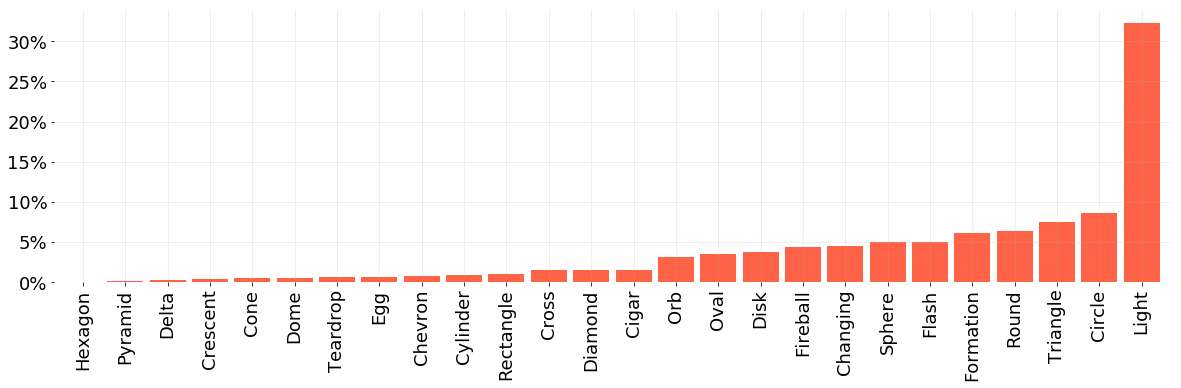

In [8]:
#CALCULATE SUPPORT FOR EACH SHAPE CATEGORY
support = {}
for shape in matrix_df.columns:
    support[shape] = np.sum(matrix_df[shape] > 0)

#PLOTTING SUPPORT VALUES
fig, ax = plt.subplots(figsize=(20,5))
for s in ax.spines: ax.spines[s].set_visible(False)
supportSorted = pd.Series(support).sort_values()
supportSorted = 100 * supportSorted / supportSorted.sum()
supportSorted.plot(kind='bar', width=0.85, fontsize=18, color='tomato',ax=ax)
ax.grid(True, alpha=0.25)
ax.set_yticklabels(['{:,.0f}%'.format(y) for y in ax.get_yticks()])
plt.show()

Distribution is tremendously skewed towards 'light'-shaped ufos, so we should drop this to glean more interesting associations. Will drop hexagon column as well due to effectively zero support.

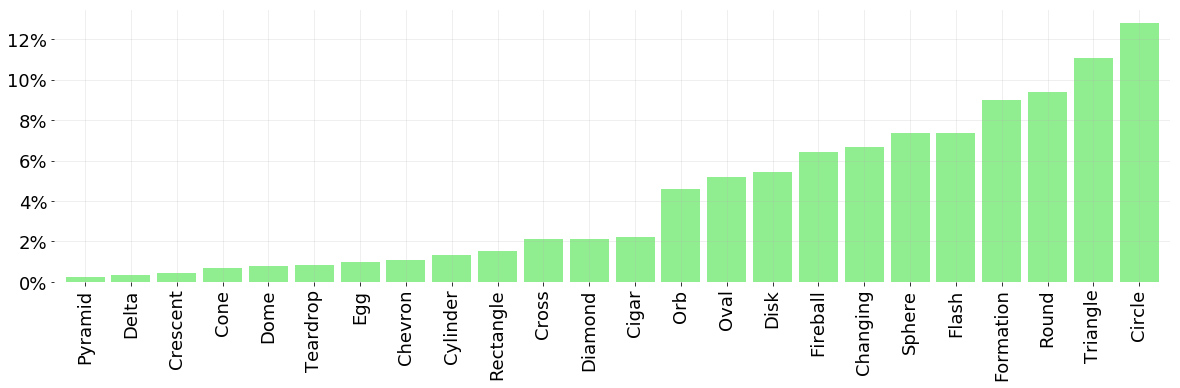

In [9]:
#CALCULATE SUPPORT FOR EACH SHAPE CATEGORY
support = {}
for shape in matrix_df.columns:
    if shape not in ['Hexagon','Light']:
        support[shape] = np.sum(matrix_df[shape] > 0)

#PLOTTING SUPPORT VALUES
fig, ax = plt.subplots(figsize=(20,5))
for s in ax.spines: ax.spines[s].set_visible(False)
supportSorted = pd.Series(support).sort_values()
supportSorted = 100 * supportSorted / supportSorted.sum()
supportSorted.plot(kind='bar', width=0.85, fontsize=18, color='lightgreen',ax=ax)
ax.grid(True, alpha=0.25)
ax.set_yticklabels(['{:,.0f}%'.format(y) for y in ax.get_yticks()])
plt.show()

Need to tally up pairs between shape categories.

In [10]:
#DROP LIGHT AND HEXAGON SHAPES
matrix_df = matrix_df.drop(['Light','Hexagon'], axis=1)

#COVNERT TO MATRIX AND SUM PAIRS 
matrix = matrix_df.values
x, y = matrix.shape
frequencies = np.zeros((y,y))
for i in range(0, y - 1):
    for j in range(i + 1, y):
        v = matrix[:, i] * matrix[:, j]
        frequencies[i, j] = np.sum(v > 0)

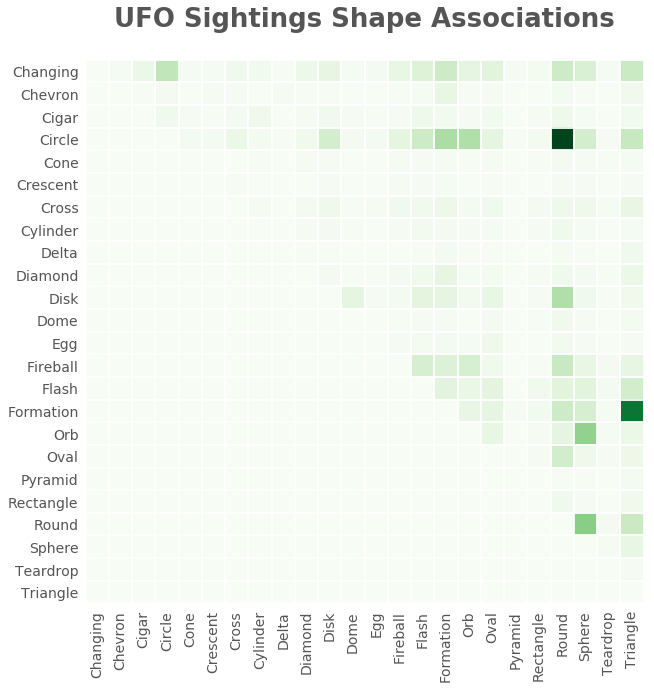

In [11]:
#HEAT MAPPING BY STATE
fig, ax = plt.subplots(figsize=(10,10))

for spine in ['top','right','bottom','left']: ax.spines[spine].set_visible(False)
ax.set_title('UFO Sightings Shape Associations', fontsize=26, fontweight='bold', color='#555555', y=1.05)

matrix = frequencies
cols = matrix_df.columns
rows = matrix_df.columns

width = len(cols)
height = len(rows)

ax.imshow(matrix, alpha=1.0, interpolation='none', aspect='auto', cmap='Greens')

# Major ticks
ax.set_xticks(np.arange(0, width, 1));
ax.set_yticks(np.arange(0, height, 1));

# Labels for major ticks
ax.set_xticklabels(cols, fontsize=14, color='#555555', rotation=90);
ax.set_yticklabels(rows, fontsize=14, color='#555555');

# Minor ticks
ax.set_xticks(np.arange(-0.5, width, 1), minor=True);
ax.set_yticks(np.arange(-0.5, height, 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='#FFFFFF', linestyle='solid', linewidth=1.8)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.show()

In [12]:
def pairs(matrix, minimum):
    pair_dict = {}
    loc = np.where(matrix > minimum)
    x, y = loc[0], loc[1]
    for idx, val in enumerate(x):
        i, j = x[idx], y[idx]
        pair = matrix_df.columns[i] + ', ' + matrix_df.columns[j]
        pair_dict[pair] = matrix[i, j]
    return pair_dict

In [13]:
all_pairs = pd.Series(pairs(matrix, minimum=1)).sort_values(ascending=False).to_frame('Pairs')
all_pairs.head(25)

,Pairs
"Circle, Round",2309.0
"Formation, Triangle",1927.0
"Round, Sphere",1016.0
"Orb, Sphere",959.0
"Circle, Formation",793.0
"Disk, Round",741.0
"Circle, Orb",740.0
"Changing, Circle",631.0
"Circle, Triangle",575.0
"Fireball, Round",563.0


We have our frequency pairs, let's calculate support and confidence values.

In [14]:
#CALCULATE SUPPORT, OR PERCENTAGE OF PAIRS
all_pairs['Support'] = 100 * all_pairs['Pairs'] / all_pairs['Pairs'].sum()
all_pairs['Support'] = all_pairs['Support'].round(2)

In [15]:
#CALCULATE CONFIDENCE OF {A -> B} PAIRS USING SUPPORT-A VALUES
all_pairs['AB Confidence'] = pd.Series(all_pairs.index).apply(lambda x: x.split(', ')[0]).tolist()
all_pairs['BA Confidence'] = pd.Series(all_pairs.index).apply(lambda x: x.split(', ')[1]).tolist()

#LOOK-UP SUPPORT FOR INDIVIDUAL SHAPES, EXCLUDING HEXAGON AND LIGHT CATEGORIES
support = supportSorted.round(2)
support_dict = dict(zip(support.index, support.values.round(2)))

#MAP INDIVIDUAL SHAPE CATEGORIES TO SHAPE SUPPORTS AND TAKE QUOTIENT
all_pairs['AB Confidence'] = 100 * all_pairs['Support'] / all_pairs['AB Confidence'].replace(support_dict)
all_pairs['BA Confidence'] = 100 * all_pairs['Support'] / all_pairs['BA Confidence'].replace(support_dict)

In [16]:
all_pairs = all_pairs.round(2)

In [17]:
all_pairs.head(25)

,Pairs,Support,AB Confidence,BA Confidence
"Circle, Round",2309.0,6.84,53.48,73.00
"Formation, Triangle",1927.0,5.71,63.59,51.67
"Round, Sphere",1016.0,3.01,32.12,41.01
"Orb, Sphere",959.0,2.84,61.74,38.69
"Circle, Formation",793.0,2.35,18.37,26.17
"Disk, Round",741.0,2.20,40.44,23.48
"Circle, Orb",740.0,2.19,17.12,47.61
"Changing, Circle",631.0,1.87,27.95,14.62
"Circle, Triangle",575.0,1.70,13.29,15.38
"Fireball, Round",563.0,1.67,25.97,17.82


Let's isolate statistically significant pairs.

In [18]:
def z_score(x):
    mean = np.mean(x)
    std = np.std(x)
    x = (x - mean) / std
    return x

In [19]:
all_pairs['Z-Score'] = z_score(all_pairs['Pairs'])

In [20]:
all_pairs[all_pairs['Z-Score'] > 1.96].round(2)

,Pairs,Support,AB Confidence,BA Confidence,Z-Score
"Circle, Round",2309.0,6.84,53.48,73.00,9.05
"Formation, Triangle",1927.0,5.71,63.59,51.67,7.47
"Round, Sphere",1016.0,3.01,32.12,41.01,3.69
"Orb, Sphere",959.0,2.84,61.74,38.69,3.45
"Circle, Formation",793.0,2.35,18.37,26.17,2.77
"Disk, Round",741.0,2.20,40.44,23.48,2.55
"Circle, Orb",740.0,2.19,17.12,47.61,2.55
"Changing, Circle",631.0,1.87,27.95,14.62,2.09


A Z-score of 1.96 marks the 95% confidence level that a result is statistically significant for a given distribution of values. In this case, the most interesting associations are UFO sightings which involve either triangular or circular objects flying in formation. We've also obtained a 63% confidence measurement that a sighted formation will consist of triangular UFOs.